<a href="https://colab.research.google.com/github/davidsdatascience/Modelling-the-UK-Retail-Market/blob/master/gLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
from scipy.integrate import odeint
import itertools
import ast
import pandas as pd
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from numpy import *
import pylab as p
import numpy as np
from scipy.integrate import odeint
import matplotlib.animation as animation
import itertools
import ast
import pandas as pd

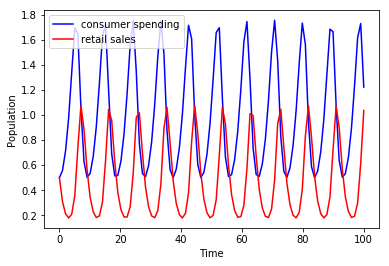

In [2]:
a = 0.5
b = 1.0
c = 1.0
d = 1.0


def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 100, 100)
P0 = [0.5, 0.5]
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]


plt.plot(ts, customer, color='Blue', label="consumer spending")
plt.plot(ts, retailer, color='Red', label="retail sales")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

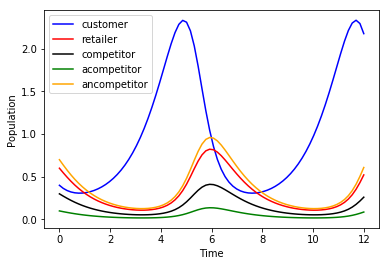

In [3]:
a = 1.0
b = 1.0
c = 1.0
d = 1.0
e = 1.0
f = 1.0
g = 1.0
h = 1.0
i = 1.0
j = 1.0
k = 1.0
m = 1.0
n = 1.0



def dP_dt(P, t):
    return [P[0]*(a - b*P[1]-g*P[2]-j*P[3]- n*P[4]), -P[1]*(c - d*P[0]), -P[2]*(e - f*P[0]), -P[3]*(h - i*P[0]), -P[4]*(k - m*P[0]) ]


P0 = [0.4, 0.6, 0.3, 0.1, 0.7] #initial population
ts = np.linspace(0, 12,80, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]
competitor=Ps[:,2]
acompetitor=Ps[:,3]
ancompetitor = Ps[:, 4]

plt.plot(ts, customer, color='Blue', label="customer")
plt.plot(ts, retailer, color='Red', label="retailer")
plt.plot(ts, competitor, color ='Black',label="competitor" )
plt.plot(ts, acompetitor, color ='Green',label="acompetitor" )
plt.plot(ts, ancompetitor, color = 'orange', label ="ancompetitor")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

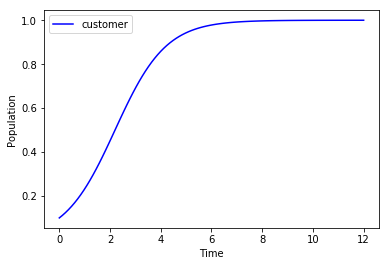

In [4]:
a = 1.0
b = 10.5
c = 0.5
d = 0.5
r=0.1
k=1.0


def dP_dt(P, t):
    return P[0]*(1 - (P[0]/k))

ts = np.linspace(0, 12, 100)
P0 = [0.1]
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]



plt.plot(ts, customer, color='Blue', label="customer")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

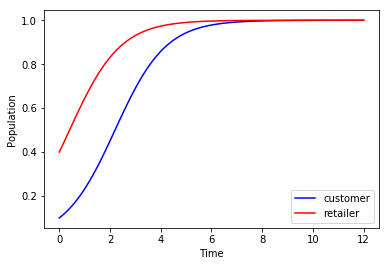

In [5]:
#Independent logostic curve for customer and retailer


k=[1.0,3.0]# carrying capacity
r=[1.0,0.3]# r is inherent per-capita growth rate
P0=[0.1, 0.4]#initial value of population 1 and population 2 at t=0
A=np.matrix([[1.0,0.0],[0.0,1.0]])#interaction matrix



def dP_dt(P,t):
    return [P[0]*(1 - P[0]), P[1]*(1-P[1])]




ts = np.linspace(0, 12, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]


plt.plot(ts, customer, color='Blue', label="customer")
plt.plot(ts, retailer, color='Red', label="retailer")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

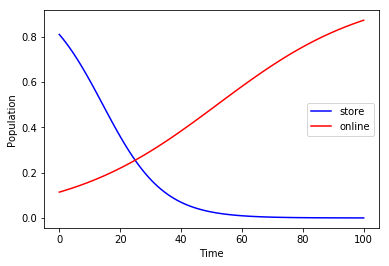

In [7]:
#Include intraction between the retailer and customer via the interaction matrix A
# department store marketshare =81%
# online retailer market share = 11.4
# growth rate of department store share = -10%
# growth rate of online retailers = 4.1%

#see https://sites.duke.edu/djepapers/files/2016/08/jones.pdf
#https://ir.debenhams.com/static-files/0fd324ce-5cb4-4a35-8429-11ac949bf908
#https://ir.debenhams.com/sites/g/files/knoqqb38816/themes/site/nir_pid1372/IAR/assets/downloads/Financial%20Statements.pdf

k=[1.0,1.0]# carrying capacity
r=[-0.1,0.04]# r is inherent per-capita growth rate
P0=[0.81, 0.114]#initial value of population 1 and population 2 at t=0
A=np.matrix([[-0.03,0.0],[0.0,0.030]])#interaction matrix




def dP_dt(P,t):
    return [r[0]*P[0]*(1 - P[0]-A[0,0]*P[1]/k[0]), r[1]*P[1]*(1-P[1]-A[1,1]*P[0]/k[1])]

ts = np.linspace(0, 100, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]


plt.plot(ts, customer, color='Blue', label="store")
plt.plot(ts, retailer, color='Red', label="online")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

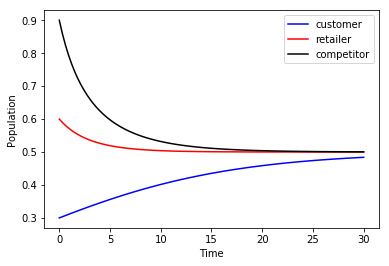

In [8]:
#Include intraction between the retailer and customer via the interaction matrix A
#dx1/dt=r1x1(1-(x1+a12x2))
#

k=[1.0,1.0, 0.5]# carrying capacity => absorb into interaction matrix
r=[0.1,0.3, 0.2]# r is inherent per-capita growth rate
P0=[0.3, 0.6, 0.9]#initial value of population 1 and population 2 at t=0
A=np.matrix([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0] ])#interaction matrix

                   

def dP_dt(P,t):
    return [r[0]*P[0]*(1 -(P[0]+A[0,0]*P[0] +A[0,1]*P[1]+A[0,2]*P[2] )), r[1]*P[1]*(1 -(P[1]+A[1,0]*P[0]+A[1,1]*P[1]+A[1,2]*P[2])), r[2]*P[2]*(1 -(P[2]+A[2,0]*P[0]+A[2,1]*P[1]+A[2,2]*P[2]))]

ts = np.linspace(0, 30, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]
competitor =Ps[:,2]


plt.plot(ts, customer, color='Blue', label="customer")
plt.plot(ts, retailer, color='Red', label="retailer")
plt.plot(ts, competitor, color='Black', label="competitor")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

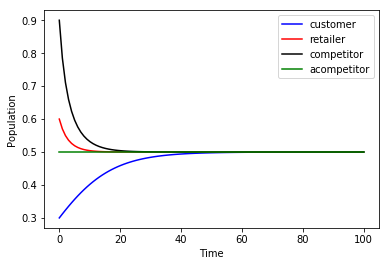

In [9]:
#Include intraction between the retailer and customer via the interaction matrix A
#dx1/dt=r1x1(1-(x1+a12x2))
#

k=[1.0,1.0, 0.5, 0.7]# carrying capacity => absorb into interaction matrix
r=[0.1,0.3, 0.2, 0.5]# r is inherent per-capita growth rate
P0=[0.3, 0.6, 0.9, 0.5]#initial value of population 1 and population 2 at t=0
A=np.matrix([[1.0,0.0,0.0, 0.0],[0.0,1.0,0.0, 0.0],[0.0,0.0,1.0, 0.0],[0.0,0.0,0.0, 1.0]])#interaction matrix

                   

def dP_dt(P,t):
    return [r[0]*P[0]*(1 -(P[0]+A[0,0]*P[0] +A[0,1]*P[1]+A[0,2]*P[2]+A[0,3]*P[3] )), r[1]*P[1]*(1 -(P[1]+A[1,0]*P[0]+A[1,1]*P[1]+A[1,2]*P[2]+A[1,3]*P[3])), r[2]*P[2]*(1 -(P[2]+A[2,0]*P[0]+A[2,1]*P[1]+A[2,2]*P[2]+A[2,3]*P[3])),r[3]*P[3]*(1 -(P[3]+A[3,0]*P[0]+A[3,1]*P[1]+A[3,2]*P[2]+A[3,3]*P[3] ))]


ts = np.linspace(0, 100, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]
competitor =Ps[:,2]
acompetitor =Ps[:,3]

plt.plot(ts, customer, color='Blue', label="customer")
plt.plot(ts, retailer, color='Red', label="retailer")
plt.plot(ts, competitor, color='Black', label="competitor")
plt.plot(ts, acompetitor, color='Green', label="acompetitor")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

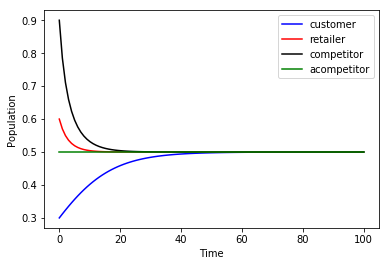

In [10]:
#Include intraction between the retailer and customer via the interaction matrix A
#dx1/dt=r1x1(1-(x1+a12x2))
#

k=[1.0,1.0, 0.5, 0.7]# carrying capacity => absorb into interaction matrix
r=[0.1,0.3, 0.2, 0.5]# r is inherent per-capita growth rate
P0=[0.3, 0.6, 0.9, 0.5]#initial value of population 1 and population 2 at t=0
A=np.matrix([[1.0,0.0,0.0, 0.0],[0.0,1.0,0.0, 0.0],[0.0,0.0,1.0, 0.0],[0.0,0.0,0.0, 1.0]])#interaction matrix

                   

def dP_dt(P,t):
    return [r[0]*P[0]*(1 -(P[0]+A[0,0]*P[0] +A[0,1]*P[1]+A[0,2]*P[2]+A[0,3]*P[3] )), r[1]*P[1]*(1 -(P[1]+A[1,0]*P[0]+A[1,1]*P[1]+A[1,2]*P[2]+A[1,3]*P[3])), r[2]*P[2]*(1 -(P[2]+A[2,0]*P[0]+A[2,1]*P[1]+A[2,2]*P[2]+A[2,3]*P[3])),r[3]*P[3]*(1 -(P[3]+A[3,0]*P[0]+A[3,1]*P[1]+A[3,2]*P[2]+A[3,3]*P[3] ))]


ts = np.linspace(0, 100, 100)
Ps = odeint(dP_dt, P0, ts)
customer = Ps[:,0]
retailer = Ps[:,1]
competitor =Ps[:,2]
acompetitor =Ps[:,3]

plt.plot(ts, customer, color='Blue', label="customer")
plt.plot(ts, retailer, color='Red', label="retailer")
plt.plot(ts, competitor, color='Black', label="competitor")
plt.plot(ts, acompetitor, color='Green', label="acompetitor")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();